# Ejemplo de uso de Aprendizaje Supervisado

Primeramente importamos la librerías básicas!

In [1]:
import numpy as np
import pandas as pd

Importamos un set de datos del titanic:

https://www.kaggle.com/c/titanic/data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/egrochos/DevNetCreate2019/master/titanic.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
cols_to_use = ['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']

In [6]:
data = data[cols_to_use]

In [7]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [8]:
data.isnull().values.any()

True

In [9]:
data = data.dropna()

In [10]:
data.isnull().values.any()

False

In [11]:
data.shape

(714, 7)

# Modelo de aprendizaje simple

## Preparando los datos

In [12]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})

In [13]:
features = data[['Sex','Age','Fare']]

In [14]:
labels = data['Survived']

In [15]:
features.head()

,Sex,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## Segmentar los datos

Se segmenta el set de datos en datos de training y de testing.

In [16]:
from sklearn.model_selection import train_test_split

Por defecto hace 75% para training y 25% para testing aproximadamente.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=13)

In [18]:
x_train.shape

(535, 3)

In [19]:
x_test.shape

(179, 3)

In [20]:
y_train.shape

(535,)

In [21]:
y_test.shape

(179,)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 3)

max_depth es un hiperparámetro

Ahora se entrena el modelo:

In [39]:
DecisionTreeModel.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Se puede generar una imagen del modelo (primero instalar graphviz):

In [40]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not survived','Survived'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'])

0

<img src='simple_tree.png' width = 1000px>

In [42]:
from sklearn.metrics import accuracy_score

Se generan los valores que el modelo predice en el set de pruebas

In [43]:
y_predict = DecisionTreeModel.predict(x_test)

Se califica la precisión del modelo

## Modelo de aprendizaje

In [44]:
accuracy_score(y_test, y_predict)

0.8044692737430168

## Un modelo más completo

In [45]:
features = data[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [46]:
labels = data['Survived']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=13)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3, min_samples_split=20, n_estimators=500, max_depth=None, random_state=13)

In [50]:
RandomForestModel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [51]:
y_predict = RandomForestModel.predict(x_test)

In [52]:
accuracy_score(y_test, y_predict)

0.8100558659217877

In [54]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not survived','Survived'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'])

0

<img src='complete_tree.png' width = 1000px>

In [56]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':RandomForestModel.feature_importances_})

In [57]:
importances = importances.sort_values('importance',ascending = False).set_index('feature')

In [58]:
importances.head(9)

,importance
feature,
Sex,0.383586
Fare,0.208095
Pclass,0.177676
Age,0.166756
SibSp,0.034323
Parch,0.029565


In [59]:
from matplotlib import pyplot as plt

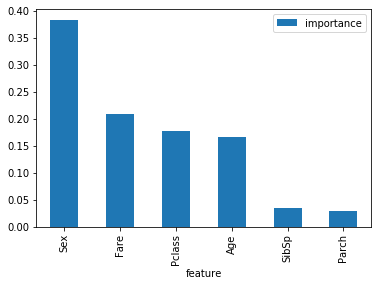

In [60]:
importances.plot.bar()

Nota: base de datos: https://scikit-learn.org/stable/datasets/index.html#toy-datasets